# Pytorch图片数据生成器

In [24]:
import numpy as np
#from numpy.lib.arraypad import _validate_lengths
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import random as rd
import os
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
from torchvision import transforms as T
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
#from skimage import io
import torch
from torchvision import transforms, datasets
import torch.nn as nn


* 加载数据

In [25]:
image_path = './sea_ice\\image\\'
mask_path = './sea_ice\\label\\'
result_path = './prediction\\'
target_size = (256,256)

In [26]:
# first of all check the image format,confirm the max value (uint8 0-255)
def Load_Color_Data(image_path, mask_path):
    image_name_arr = glob.glob(os.path.join(image_path,"*.jpg"))
    image_arr = []
    mask_arr = []
    
    #对img归一化，mask二值化
    for index,item in enumerate(image_name_arr):        #得到所有图片路径
        img = Image.open(item)                             #读取
        # img=np.resize(img,(256,256))
        # img = np.reshape(img,img.shape + (1,))
        # print(item,item.replace(image_path,mask_path))
        mask = Image.open(item.replace(image_path,mask_path))     #得到MASK路径下对应的文件
        # mask=np.resize(mask,(256,256))
        # mask = np.reshape(mask,img.shape  + (1,))
        img = np.array(img) / 255                                         #归一化
        mask = np.array(mask) /255                                        #归一化
        mask[mask > 0.5] = 1                                     # 二值化
        mask[mask <= 0.5] = 0
        image_arr.append(img)
        mask_arr.append(mask)

    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr, mask_arr      #返回数组

def plot_func(data,label):
    fig=plt.figure(figsize=(25,5))
    for i in range(16):
        plt.subplot(2,8,i+1)
        plt.imshow(Image.fromarray(np.uint8((data[i,:,:,0])*255)))# 数组转图像并显示
    plt.show()
    fig=plt.figure(figsize=(25,5))
    for i in range(16):                                        #显示二值图像（标签）
        plt.subplot(2,8,i+1)
        plt.imshow((label[i,:,:,0]),cmap="gray")
    plt.show()

In [27]:
images, labels = Load_Color_Data(image_path, mask_path)   #预处理
# images = np.reshape(images,images.shape + (1,))
labels = np.reshape(labels, labels.shape + (1,))
threshold = 500
xtrain, xtest, ytrain, ytest = train_test_split(images[:threshold], labels[:threshold], test_size=0.3)  #使用前500个为训练测试集
xval=images[threshold:]      #后面的
yval=labels[threshold:]
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,xval.shape,yval.shape)


(139, 256, 256, 3) (60, 256, 256, 3) (139, 256, 256, 1) (60, 256, 256, 1) (0, 256, 256, 3) (0, 256, 256, 1)


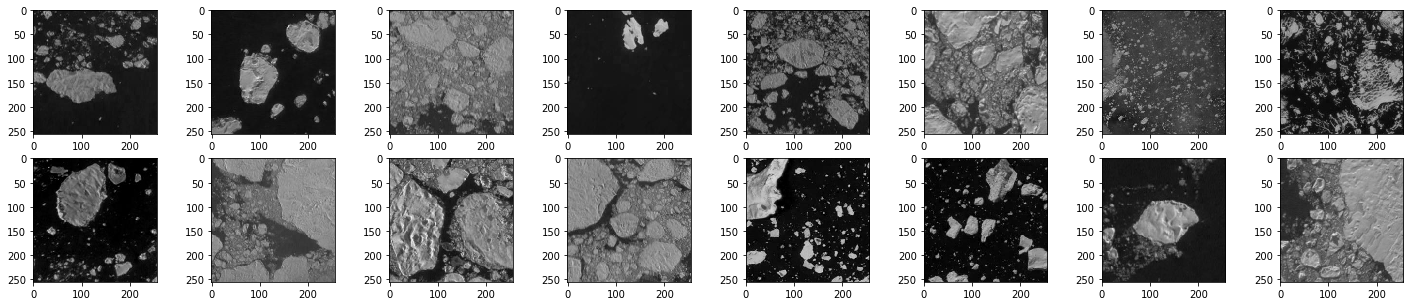

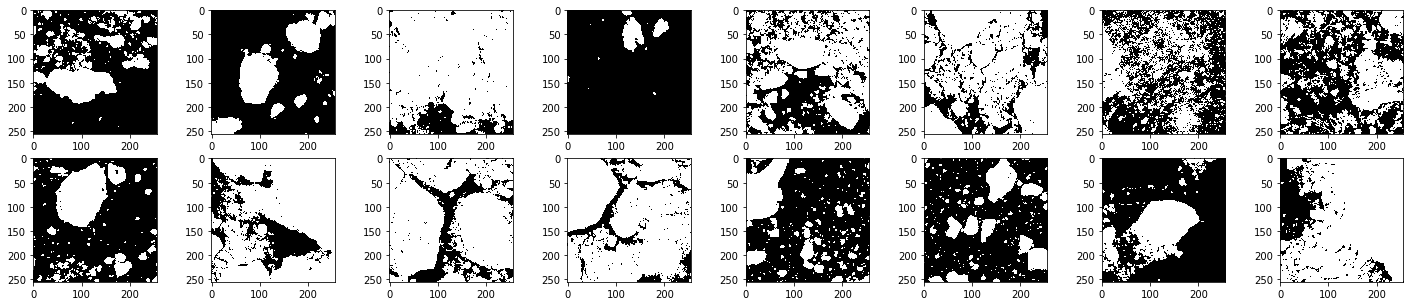

In [28]:
# Check whether the images are consistent with the labels
plot_func(xtrain,ytrain)

* setp3 

In [51]:
def train_data_Generator(tr_datas,tr_labels,batch_size,random_ = True):      #训练集生成器
    datas = tr_datas
    labels = tr_labels
    #打乱顺序
    if random_ is True:
        m = len(datas)
        for i in range(m):
            #print ("随机数: ", rd.random())  #random.random())
            j = int(rd.random() * (i + 1))
            if j<=m-1:
                datas[i],datas[j]=datas[j],datas[i]
                labels[i],labels[j]=labels[j],labels[i]
    #分批
    num_batch = len(datas)//batch_size
    for i in range(num_batch):
        imgs = []
        train_datas = datas[batch_size*i:batch_size*(i+1)]
        train_lables = labels[batch_size*i:batch_size*(i+1)]
        for img in train_datas:
#             print(img_path[1,1,1])
#             img = cv2.imread(img_path)
            #img = cv2.resize(img,resize_shape)
            #img = img/255 #归一化处理
            imgs.append(img)
        yield np.array(imgs), np.array(train_lables)


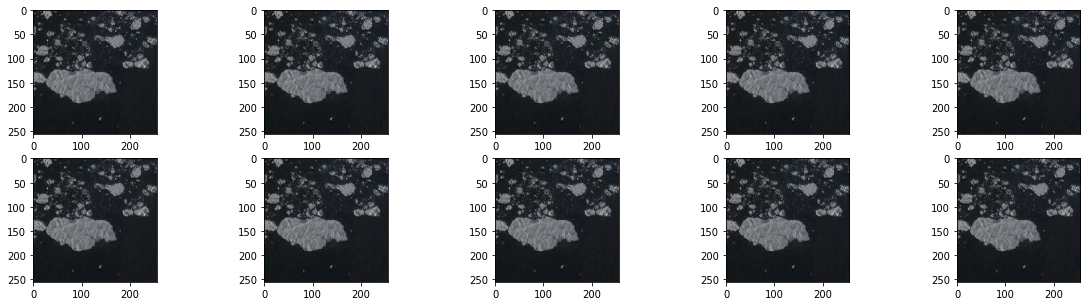

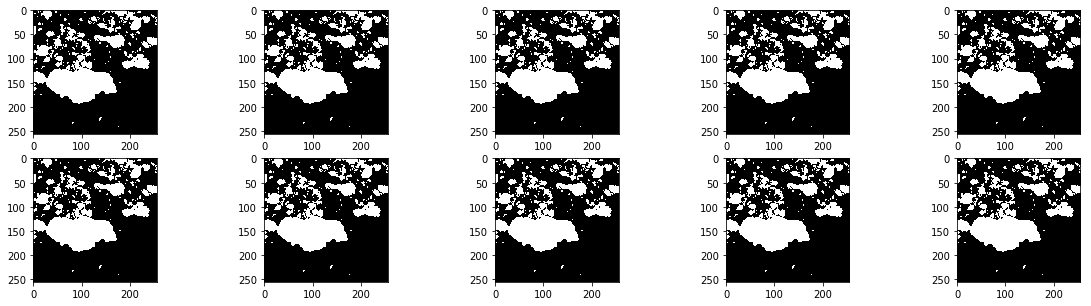

In [52]:
geiter=train_data_Generator(xtrain,ytrain,20)
data,label=next(geiter)

fig=plt.figure(figsize=(20,5))
for i in range(10):   
    plt.subplot(2,5,i+1)
    plt.imshow((data[i,:,:,:]))
plt.show()
fig=plt.figure(figsize=(20,5))
for i in range(10):   
    plt.subplot(2,5,i+1)
    plt.imshow((label[i,:,:,0]),cmap="gray")
plt.show()